2988.8105
46291.242
The test image belongs to class same as reference image 1 with a distance of 2988


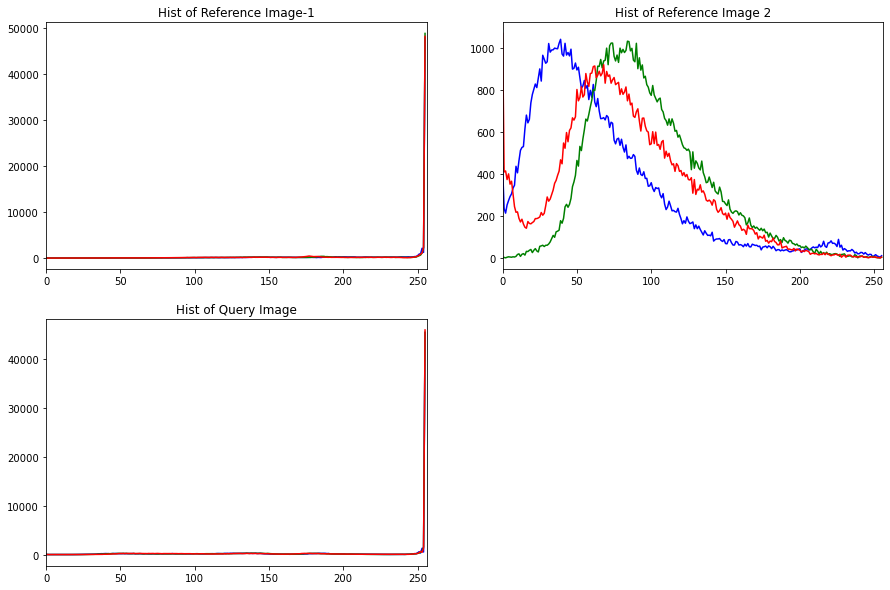

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


fig=plt.figure(figsize=(15,10))
ax0 =plt.subplot(2,2,1)
image1 = cv2.imread('Reference_image1.jpg')
height, width, channels = image1.shape 
dim=(width,height) 
for i, col in enumerate(['b', 'g', 'r']):
    hist1 = cv2.calcHist([image1], [i], None, [256], [0, 256])
    plt.plot(hist1, color = col)
    plt.xlim([0, 256])
    
ax0.set_title("Hist of Reference Image-1")    
############################################    
ax1 =plt.subplot(2,2,2)

image2 = cv2.imread('Reference_image2.jpg')
# NOTE : We have to resize ref image 2 as the image has dimensions (324 X 256) which is slightly off by (320 X 256)
# which is the dimensions of both reference image 1 and query image
resized_image2 = cv2.resize(image2,dim)
cv2.imwrite("Resized_Reference_image2.jpg",resized_image2)
for i, col in enumerate(['b', 'g', 'r']):
    hist2 = cv2.calcHist([resized_image2], [i], None, [256], [0, 256])
    plt.plot(hist2, color = col)
    plt.xlim([0, 256])

    
ax1.set_title("Hist of Reference Image 2")
###########################################    
#plt.show()

ax2 =plt.subplot(2,2,3)
qimage = cv2.imread('Query_image.jpg')
for i, col in enumerate(['b', 'g', 'r']):
    hist3 = cv2.calcHist([qimage], [i], None, [256], [0, 256])
    plt.plot(hist3, color = col)
    plt.xlim([0, 256])

ax2.set_title("Hist of Query Image");

fig.savefig('snap5.png')

image1_bw = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY ) 
resized_image2_bw = cv2.cvtColor(resized_image2, cv2.COLOR_BGR2GRAY ) 
qimage_bw = cv2.cvtColor(qimage, cv2.COLOR_BGR2GRAY ) 
dist_r1_t= np.linalg.norm(hist1 - hist3) 
print(dist_r1_t)

dist_r2_t= np.linalg.norm(hist2 - hist3) 
print(dist_r2_t)
min_dist=min([dist_r1_t,dist_r2_t]);
print("The test image belongs to class same as reference image %d with a distance of %d"%([dist_r1_t,dist_r2_t].index(min_dist)+1,min_dist));
